In [1]:
#importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

%matplotlib inline

In [3]:
#Reading csv file
data = pd.read_csv('car-pricing-data.csv')

In [4]:
#Showing first 5 row in the data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [5]:
# Displaying nr of rows and columns
data.shape

(8128, 12)

In [6]:
#displaying first 10 rows
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [7]:
#Showing multiple features seen in the table
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
#Countig values in each column
data.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
seats            7907
dtype: int64

In [9]:
#Summing null values
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [10]:
#displaying several information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [11]:
# cleaning table from non-values
data.dropna(inplace=True)

In [12]:
# adjust the price variables
data['selling_price'] = data['selling_price'] / 1000000

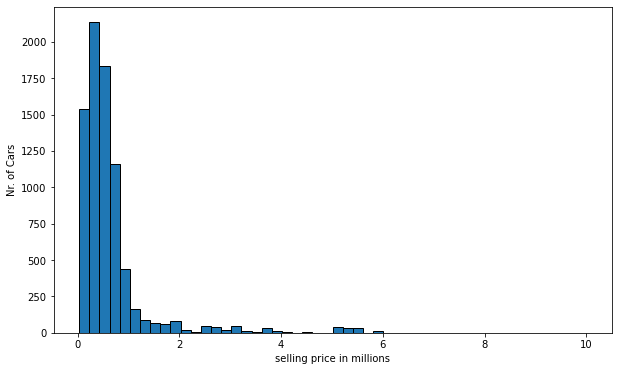

In [13]:
#Displaying price histogram
plt.figure(figsize = (10,6))
plt.hist(data['selling_price'],bins = 50 , ec = 'black')
plt.ylabel('Nr. of Cars')
plt.xlabel("selling price in millions")
plt.show()

In [14]:
#Displaying correlations
data.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.412268,-0.428434,-0.009144
selling_price,0.412268,1.000000,-0.222196,0.041358
km_driven,-0.428434,-0.222196,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


In [15]:
# Creating mask for the correlation heat-map
mask = np.zeros_like(data.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

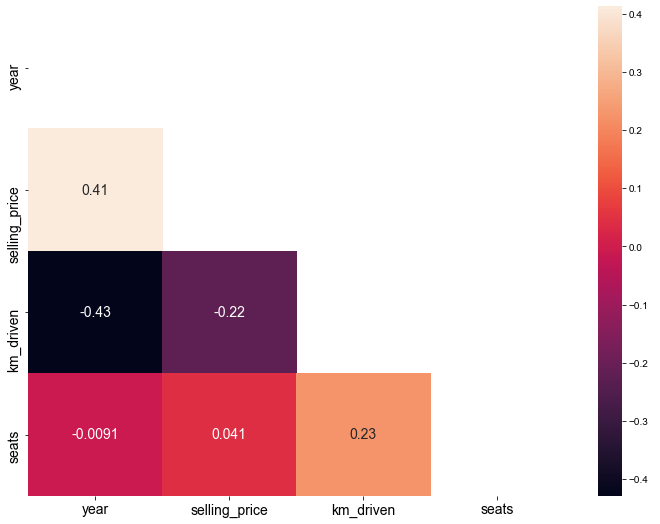

In [16]:
#Dsiplaying heat-map
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), mask = mask,annot = True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [17]:
# Displaying different types of owner column
data.owner.value_counts()

First Owner             5215
Second Owner            2017
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

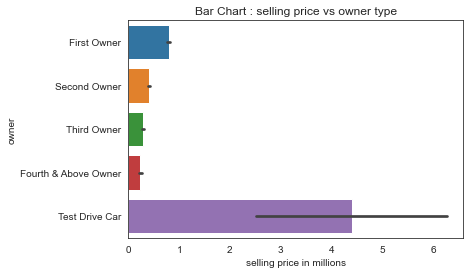

In [18]:
#Using barchart to show string values easily
plt.title('Bar Chart : selling price vs owner type')
sns.barplot(x = 'selling_price', y = 'owner',data=data)
plt.xlabel("selling price in millions")
plt.show()

In [19]:
# Displaying different types of transmission column
data.transmission.value_counts()

Manual       6866
Automatic    1041
Name: transmission, dtype: int64

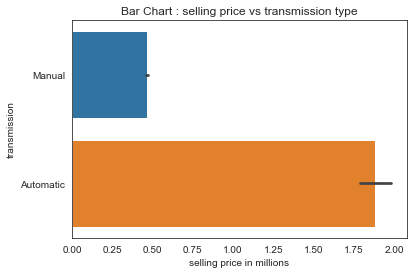

In [20]:
#Using barchart to show string values easily
plt.title('Bar Chart : selling price vs transmission type')
sns.barplot(x = 'selling_price', y = 'transmission',data=data)
plt.xlabel("selling price in millions")
plt.show()

In [21]:
# Displaying different types of seller type column
data.seller_type.value_counts()

Individual          6564
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

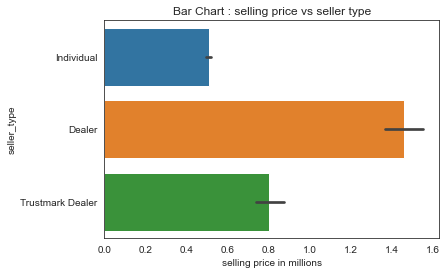

In [22]:
#Using barchart to show string values easily
plt.title('Bar Chart : selling price vs seller type')
sns.barplot(x='selling_price',y = 'seller_type', data = data)
plt.xlabel('selling price in millions')
plt.show()

In [23]:
# Displaying different types of fuel column
data.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: fuel, dtype: int64

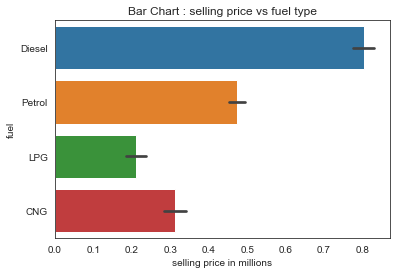

In [24]:
#Using barchart to show string values easily
plt.title('Bar Chart : selling price vs fuel type')
sns.barplot(x = 'selling_price', y = 'fuel', data = data)
plt.xlabel('selling price in millions')
plt.show()

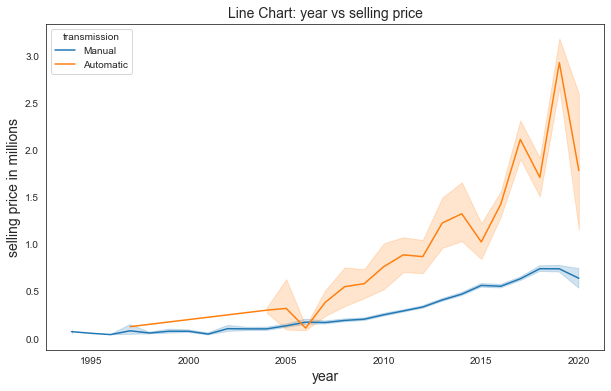

In [25]:
#using lineplot price vs year for showing transmissions
plt.figure(figsize=(10,6))
plt.title('Line Chart: year vs selling price', fontsize = 14)
sns.lineplot(x='year',y = 'selling_price',data = data,hue = "transmission")
plt.ylabel('selling price in millions',fontsize = 14)
plt.xlabel('year',fontsize = 14)
plt.show()

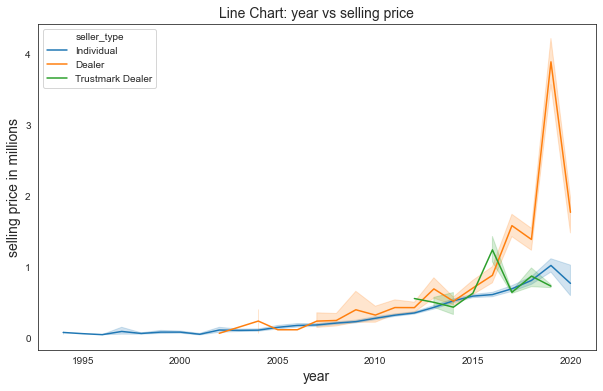

In [26]:
#using lineplot price vs year for showing seller types
plt.figure(figsize=(10,6))
plt.title('Line Chart: year vs selling price', fontsize = 14)
sns.lineplot(x='year',y = 'selling_price',data = data,hue = "seller_type")
plt.ylabel('selling price in millions',fontsize = 14)
plt.xlabel('year',fontsize = 14)
plt.show()

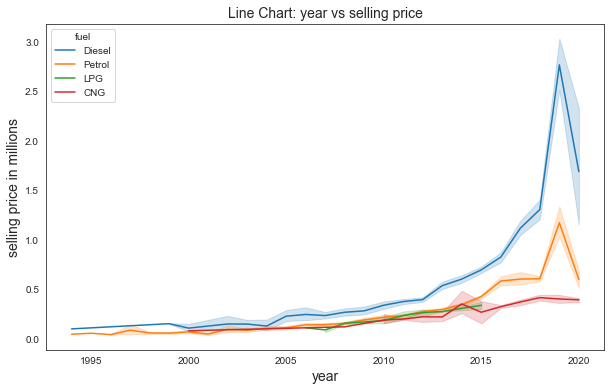

In [27]:
#using lineplot price vs year for showing fuels
plt.figure(figsize=(10,6))
plt.title('Line Chart: year vs selling price', fontsize = 14)
sns.lineplot(x='year',y = 'selling_price',data = data,hue = "fuel")
plt.ylabel('selling price in millions',fontsize = 14)
plt.xlabel('year',fontsize = 14)
plt.show()

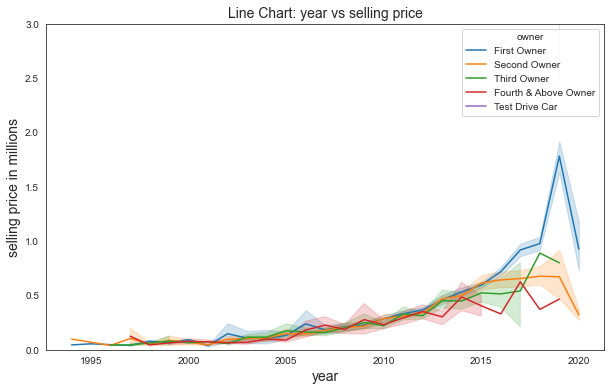

In [28]:
#using lineplot price vs year for showing owners
plt.figure(figsize=(10,6))
plt.title('Line Chart: year vs selling price', fontsize = 14)
sns.lineplot(x='year',y = 'selling_price',data = data,hue = "owner")
plt.ylabel('selling price in millions',fontsize = 14)
plt.xlabel('year',fontsize = 14)
plt.ylim(0,3)
plt.show()

In [29]:
#spliting engine column for extracting numbers
data_eng = data['engine'].str.split(expand=True)
data_eng

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [30]:
#adding a new column & converting series to list and int type
data['engine (CC)'] = data_eng[0].astype(int).tolist()

In [31]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine (CC)
0,Maruti Swift Dzire VDI,2014,0.450,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,0.370,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1498
2,Honda City 2017-2020 EXi,2006,0.158,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,1497
3,Hyundai i20 Sportz Diesel,2010,0.225,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1396
4,Maruti Swift VXI BSIII,2007,0.130,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,1298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,0.320,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,1197
8124,Hyundai Verna CRDi SX,2007,0.135,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,1493
8125,Maruti Swift Dzire ZDi,2009,0.382,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,1248
8126,Tata Indigo CR4,2013,0.290,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,1396


In [32]:
# after spliting column there is a still problem that contains bhp as string/ find problematic index
data_max_pow = data['max_power'].str.split(expand=True)
temp = data_max_pow[0]
temp.loc[temp.str.contains('bhp')]

4933    bhp
Name: 0, dtype: object

In [33]:
#getting full columns at index 4933
data.loc[4933]

name             Maruti Omni CNG
year                        2000
selling_price               0.08
km_driven                 100000
fuel                         CNG
seller_type           Individual
transmission              Manual
owner               Second Owner
mileage               10.9 km/kg
engine                    796 CC
max_power                    bhp
seats                          8
engine (CC)                  796
Name: 4933, dtype: object

In [34]:
#drop the problematic value
data.drop(index = 4933,inplace=True)

In [35]:
#after issue solved, splitting column again
data_max_pow = data['max_power'].str.split(expand=True)

In [36]:
#adding a new column & converting series to list and int type
data['max power(bhp)'] = data_max_pow[0].astype(float).tolist()

In [37]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine (CC),max power(bhp)
0,Maruti Swift Dzire VDI,2014,0.450,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,0.370,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1498,103.52
2,Honda City 2017-2020 EXi,2006,0.158,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,1497,78.00
3,Hyundai i20 Sportz Diesel,2010,0.225,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1396,90.00
4,Maruti Swift VXI BSIII,2007,0.130,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,1298,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,0.320,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,1197,82.85
8124,Hyundai Verna CRDi SX,2007,0.135,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,1493,110.00
8125,Maruti Swift Dzire ZDi,2009,0.382,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,1248,73.90
8126,Tata Indigo CR4,2013,0.290,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,1396,70.00


In [38]:
# in mileage column there are two different units, finding the less one indexes
data_mil = data['mileage']
data_mil[data_mil.str.contains('km/kg')].index

Int64Index([   6,   35,   90,  203,  402,  866,  870, 1225, 1239, 1350, 1511,
            1658, 1907, 2108, 2166, 2312, 2481, 2484, 2513, 2518, 2525, 2527,
            2573, 2579, 2588, 2613, 2618, 2730, 2740, 2758, 2767, 3010, 3042,
            3050, 3200, 3216, 3306, 3466, 3492, 3751, 3796, 3823, 3826, 3853,
            3908, 3912, 3956, 4004, 4045, 4545, 5034, 5057, 5133, 5185, 5198,
            5199, 5206, 5277, 5436, 5437, 5457, 5532, 5557, 5578, 5749, 5768,
            5784, 5789, 5792, 5793, 5815, 6007, 6253, 6338, 6488, 6856, 7040,
            7101, 7112, 7166, 7245, 7300, 7308, 7543, 7642, 7733, 7913],
           dtype='int64')

In [39]:
# understing the quantity of outliers
len(data_mil[data_mil.str.contains('km/kg')].index)

87

In [40]:
# cleaning data from outliers
data.drop(index=data_mil[data_mil.str.contains('km/kg')].index,inplace=True)

In [41]:
# displaying the shape of the rest
data.shape

(7819, 14)

In [42]:
#after issue solved, splitting column again
data_mil = data['mileage'].str.split(expand=True)
data_mil

,0,1
0,23.4,kmpl
1,21.14,kmpl
2,17.7,kmpl
3,23.0,kmpl
4,16.1,kmpl
...,...,...
8123,18.5,kmpl
8124,16.8,kmpl
8125,19.3,kmpl
8126,23.57,kmpl


In [43]:
#adding a new column & converting series to list and int type
data['mileage(kmpl)'] = data_mil[0].astype(float).tolist()

In [44]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,engine (CC),max power(bhp),mileage(kmpl)
0,Maruti Swift Dzire VDI,2014,0.450,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1248,74.00,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,0.370,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1498,103.52,21.14
2,Honda City 2017-2020 EXi,2006,0.158,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,1497,78.00,17.70
3,Hyundai i20 Sportz Diesel,2010,0.225,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1396,90.00,23.00
4,Maruti Swift VXI BSIII,2007,0.130,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,1298,88.20,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,0.320,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,1197,82.85,18.50
8124,Hyundai Verna CRDi SX,2007,0.135,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,1493,110.00,16.80
8125,Maruti Swift Dzire ZDi,2009,0.382,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,1248,73.90,19.30
8126,Tata Indigo CR4,2013,0.290,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,1396,70.00,23.57


In [45]:
#showing correlation after adjustments
data.corr()

,year,selling_price,km_driven,seats,engine (CC),max power(bhp),mileage(kmpl)
year,1.000000,0.413017,-0.428194,-0.008076,0.017166,0.227796,0.328037
selling_price,0.413017,1.000000,-0.222333,0.039338,0.453995,0.749746,-0.125662
km_driven,-0.428194,-0.222333,1.000000,0.228832,0.208611,-0.037440,-0.173283
seats,-0.008076,0.039338,0.228832,1.000000,0.610221,0.188402,-0.454086
engine (CC),0.017166,0.453995,0.208611,0.610221,1.000000,0.701499,-0.578803
max power(bhp),0.227796,0.749746,-0.037440,0.188402,0.701499,1.000000,-0.373360
mileage(kmpl),0.328037,-0.125662,-0.173283,-0.454086,-0.578803,-0.373360,1.000000


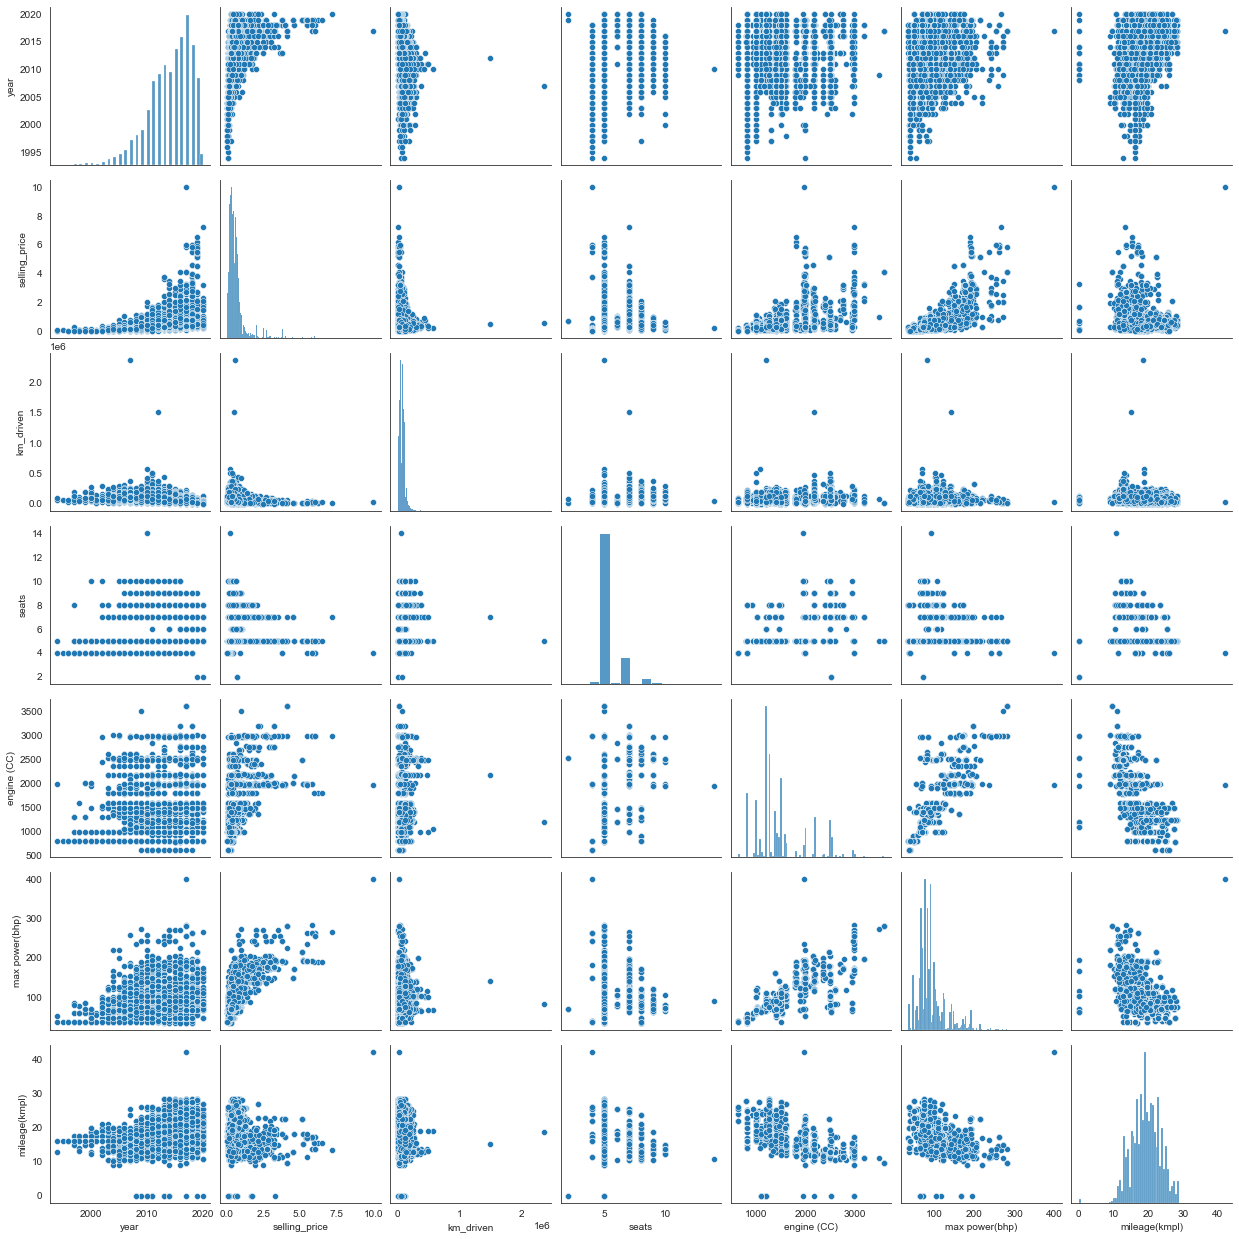

In [46]:
#showing multiple graphs in all feautre
sns.pairplot(data)
plt.show()

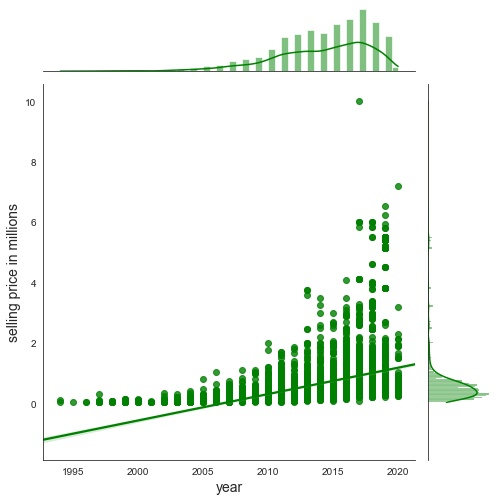

In [47]:
#using joint plot year vs price
sns.jointplot(x="year", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  color="g", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('year',fontsize = 14)
plt.show()

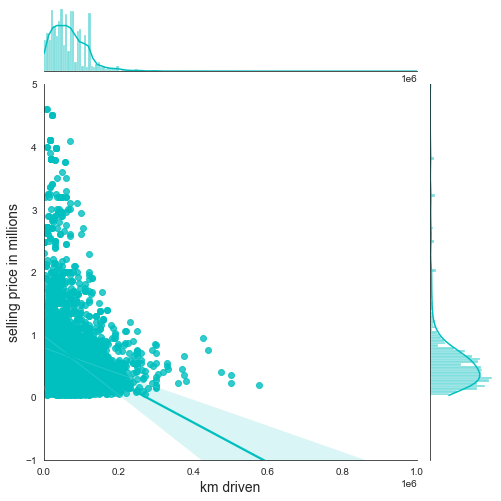

In [48]:
#using joint plot km driven vs price
sns.jointplot(x="km_driven", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  xlim=(0,1000000), ylim=(-1,5),
                  color="c", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('km driven',fontsize = 14)
plt.show()

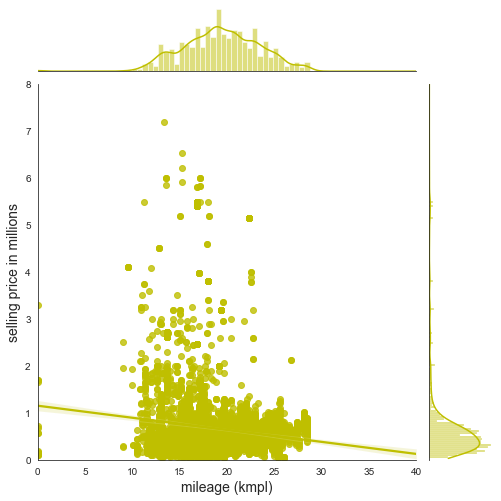

In [49]:
#using joint plot mileage vs price
sns.jointplot(x="mileage(kmpl)", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  xlim=(0,40), ylim=(0,8),
                  color="y", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('mileage (kmpl)',fontsize = 14)
plt.show()

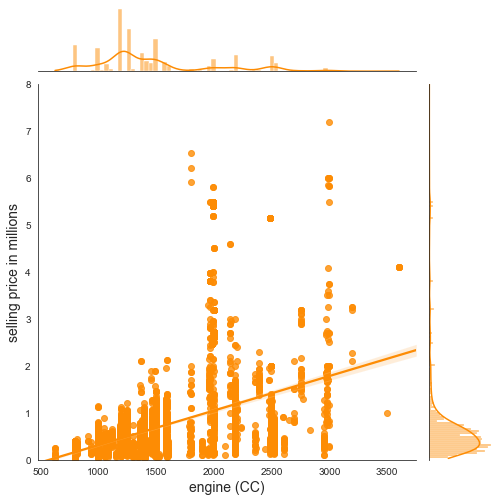

In [50]:
#using joint plot engine vs price
sns.jointplot(x="engine (CC)", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  ylim=(0,8),
                  color="#fd8c04", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('engine (CC)',fontsize = 14)
plt.show()

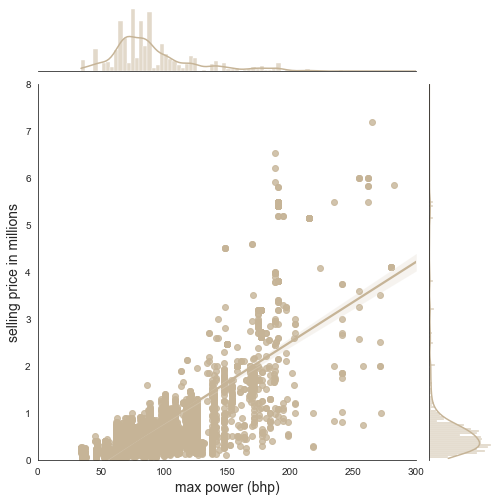

In [51]:
#using joint plot max power vs price
sns.jointplot(x="max power(bhp)", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  xlim=(0,300), ylim=(0,8),
                  color="#c6b497", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('max power (bhp)',fontsize = 14)
plt.show()

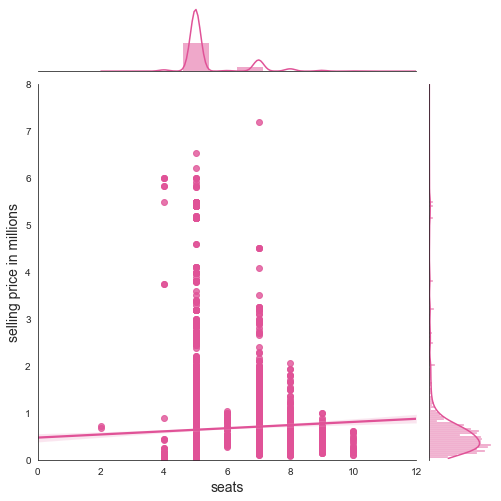

In [52]:
#using joint plot seats vs price
sns.jointplot(x="seats", y="selling_price", data=data,
                  kind="reg", truncate=False,
                  xlim=(0,12), ylim=(0,8),
                  color="#e05297", height=7)
plt.ylabel('selling price in millions' ,fontsize = 14)
plt.xlabel('seats',fontsize = 14)
plt.show()

In [53]:
# Creating mask for the correlation heat-map
mask = np.zeros_like(data.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

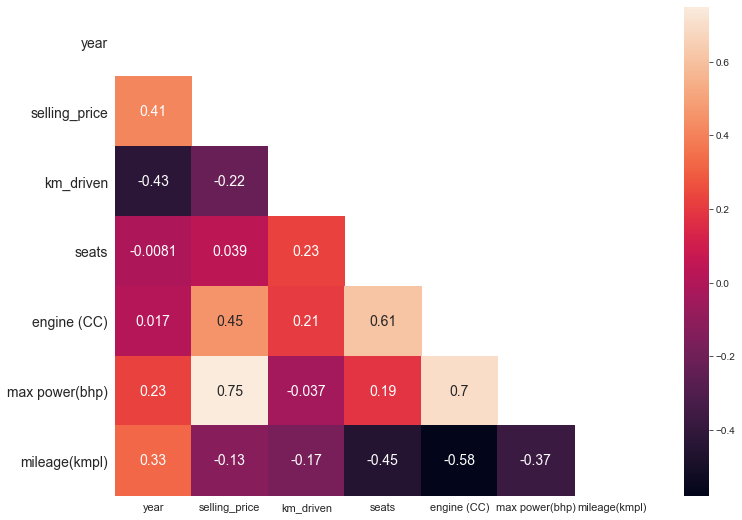

In [54]:
#Dsiplaying heat-map
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), mask = mask,annot = True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 14)
plt.show()

In [55]:
#converting year to age
def year_to_age(x):
    return 2020-x

In [56]:
# adding extra column named age
data['age'] = data['year'].apply(year_to_age)

In [57]:
#creating one-hot dummy vector for fuel values
fuel_dummy = pd.get_dummies(data.fuel)
fuel_dummy

,Diesel,Petrol
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
8123,0,1
8124,1,0
8125,1,0
8126,1,0


In [58]:
#creating one-hot dummy vector for seller type values
seller_type_dummy = pd.get_dummies(data.seller_type)
seller_type_dummy

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8123,0,1,0
8124,0,1,0
8125,0,1,0
8126,0,1,0


In [59]:
#creating one-hot dummy vector for transmission values
transmission_dummy = pd.get_dummies(data.transmission)
transmission_dummy

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8123,0,1
8124,0,1
8125,0,1
8126,0,1


In [60]:
#creating one-hot dummy vector for owner values
owner_dummy = pd.get_dummies(data.owner)
owner_dummy

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8123,1,0,0,0,0
8124,0,1,0,0,0
8125,1,0,0,0,0
8126,1,0,0,0,0


In [61]:
#displaying all columns in the data
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'engine (CC)', 'max power(bhp)', 'mileage(kmpl)', 'age'],
      dtype='object')

In [62]:
#creating a first featured data
model1_data = {'age':data.age,
               'engine(cc)': data['engine (CC)'],
               'price in millions' : data.selling_price,}
model1 = pd.DataFrame(data=model1_data)

In [63]:
#concatenating transmission dummy vector to model1
model1 = pd.concat([model1,transmission_dummy['Manual']],axis=1)
model1

,age,engine(cc),price in millions,Manual
0,6,1248,0.450,1
1,6,1498,0.370,1
2,14,1497,0.158,1
3,10,1396,0.225,1
4,13,1298,0.130,1
...,...,...,...,...
8123,7,1197,0.320,1
8124,13,1493,0.135,1
8125,11,1248,0.382,1
8126,7,1396,0.290,1


In [64]:
#since transmission is binomaial value, adding only one column is enough so change column name Manual to isManual
model1.rename(columns= {'Manual' : 'isManual'},inplace=True)

In [65]:
#determining price and features variable and spliting data into train & test
price = model1['price in millions']
features = model1.drop('price in millions',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,price,test_size = 0.2, random_state = 42)

In [66]:
#verifying x test shape
X_test.shape

(1564, 3)

In [67]:
#verifying x train shape
X_train.shape

(6255, 3)

In [68]:
#verifying y test shape
y_test.shape

(1564,)

In [69]:
# scaling x_train & x_test in range(0,1)
scaller = MinMaxScaler(feature_range=(0,1))
X_train = scaller.fit_transform(X_train)
X_test = scaller.fit_transform(X_test)

In [70]:
#testing if it works
X_train[0]

array([0.30769231, 0.26006711, 1.        ])

In [71]:
#creating first regression model constructor
regr1 = LinearRegression()

In [72]:
# training the model1
regr1.fit(X_train,y_train)

LinearRegression()

In [73]:
#showing coefficients
regr1.coef_

array([-1.66237264,  1.58078092, -1.00246008])

In [74]:
#creating the formula
_str = "y = "
for i,m in enumerate(regr1.coef_):
    _str += "x_{}*{} + ".format(i+1,m)
_str += str(regr1.intercept_)   

In [75]:
#showing the formula
print(_str)

y = x_1*-1.6623726436408877 + x_2*1.5807809163115123 + x_3*-1.0024600834416786 + 1.4593192570919655


In [76]:
# showing the score of the first model
print(regr1.score(X_test,y_test))

0.5045846151641388


In [77]:
#predicting price using model 1
y_pred1 = regr1.predict(X_test)
y_pred1

array([1.2159441 , 0.27233794, 0.04351702, ..., 1.13134163, 2.30033786,
       0.8945227 ])

In [78]:
#calculating mean squared error
mse1 = mean_squared_error(y_test,y_pred1)
mse1

0.3515638213551734

In [79]:
# calcualting mean absolute error
mae1 = mean_absolute_error(y_test,y_pred1)
mae1

0.3280071060173485

In [80]:
#calculating r2 score
r2_1 = r2_score(y_test,y_pred1)
r2_1

0.5045846151641388

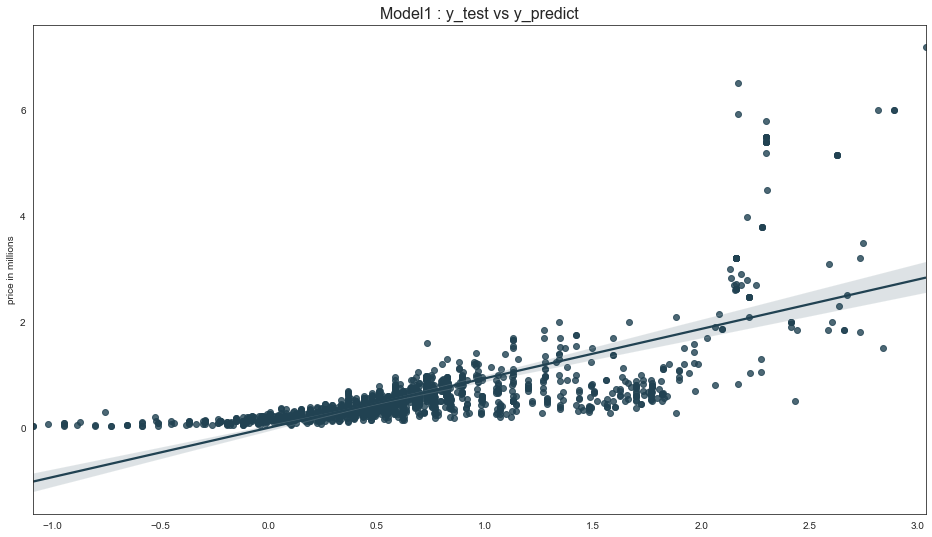

In [81]:
#displaying regression plot using y_test & y_prediction
plt.figure(figsize=(16,9))
plt.title('Model1 : y_test vs y_predict',fontsize = 16)
sns.regplot(y=y_test,x=y_pred1,color='#214252')
#plt.xlim(-3,3)
#plt.ylim(-4,8)
plt.show()

In [82]:
#creating a second featured data
model2_data = {'seats':data.seats,
               'km_driven': data.km_driven,
               'mileage(kmpl)':data['mileage(kmpl)'],
               'price in millions' : data.selling_price}
model2 = pd.DataFrame(data=model2_data)

In [83]:
# verifying model2 data frame
model2

,seats,km_driven,mileage(kmpl),price in millions
0,5.0,145500,23.40,0.450
1,5.0,120000,21.14,0.370
2,5.0,140000,17.70,0.158
3,5.0,127000,23.00,0.225
4,5.0,120000,16.10,0.130
...,...,...,...,...
8123,5.0,110000,18.50,0.320
8124,5.0,119000,16.80,0.135
8125,5.0,120000,19.30,0.382
8126,5.0,25000,23.57,0.290


In [84]:
# understanding different types of fuel columns
fuel_dummy.value_counts()

Diesel  Petrol
1       0         4299
0       1         3520
dtype: int64

In [85]:
#concatenating transmission & fuel dummy vector to model2
model2 = pd.concat([model2,transmission_dummy['Manual'],fuel_dummy['Diesel']],axis=1)
model2

,seats,km_driven,mileage(kmpl),price in millions,Manual,Diesel
0,5.0,145500,23.40,0.450,1,1
1,5.0,120000,21.14,0.370,1,1
2,5.0,140000,17.70,0.158,1,0
3,5.0,127000,23.00,0.225,1,1
4,5.0,120000,16.10,0.130,1,0
...,...,...,...,...,...,...
8123,5.0,110000,18.50,0.320,1,0
8124,5.0,119000,16.80,0.135,1,1
8125,5.0,120000,19.30,0.382,1,1
8126,5.0,25000,23.57,0.290,1,1


In [86]:
# since transmision & fuel columns are binomial, it is enought to add one column and change name accordingly
model2.rename(columns= {'Manual' : 'isManual', 'Diesel' : 'isDiesel'},inplace=True)

In [87]:
# verify the adjustments
model2

,seats,km_driven,mileage(kmpl),price in millions,isManual,isDiesel
0,5.0,145500,23.40,0.450,1,1
1,5.0,120000,21.14,0.370,1,1
2,5.0,140000,17.70,0.158,1,0
3,5.0,127000,23.00,0.225,1,1
4,5.0,120000,16.10,0.130,1,0
...,...,...,...,...,...,...
8123,5.0,110000,18.50,0.320,1,0
8124,5.0,119000,16.80,0.135,1,1
8125,5.0,120000,19.30,0.382,1,1
8126,5.0,25000,23.57,0.290,1,1


In [88]:
#determining price and features variable and spliting data into train & test
price = model2['price in millions']
features = model2.drop('price in millions',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,price,test_size = 0.2, random_state = 42)

In [89]:
# scaling x_train & x_test in range(0,1)
scaller = MinMaxScaler(feature_range=(0,1))
X_train = scaller.fit_transform(X_train)
X_test = scaller.fit_transform(X_test)

In [90]:
#creating second regression model constructor
regr2 = LinearRegression()

In [91]:
# training the model2
regr2.fit(X_train,y_train)

LinearRegression()

In [92]:
#showing coefficients
regr2.coef_

array([-0.07375494, -6.42219465, -0.6692759 , -1.30098714,  0.44515605])

In [93]:
# creating the formula
_str = "y = "
for i,m in enumerate(regr2.coef_):
    _str += "x_{}*{} + ".format(i+1,m)
_str += str(regr2.intercept_)   

In [94]:
#showing the general formula
print(_str)

y = x_1*-0.073754941978136 + x_2*-6.422194646811216 + x_3*-0.6692759019887233 + x_4*-1.300987138858767 + x_5*0.4451560541909676 + 2.0513600798720724


In [95]:
# showing the score of the second model
print(regr2.score(X_test,y_test))

-0.43976963700980165


In [96]:
#predicting price using model 2
y_pred2 = regr2.predict(X_test)
y_pred2

array([-0.95555781,  0.15446599, -1.02374614, ..., -0.43986232,
        2.00522301,  0.25919473])

In [97]:
#calculating mean squared error
mse2 = mean_squared_error(y_test,y_pred2)
mse2

1.0217101263942763

In [98]:
# calcualting mean absolute error
mae2 = mean_absolute_error(y_test,y_pred2)
mae2

0.8004188377142549

In [99]:
#calculating r2 score
r2_2 = r2_score(y_test,y_pred2)
r2_2

-0.43976963700980165

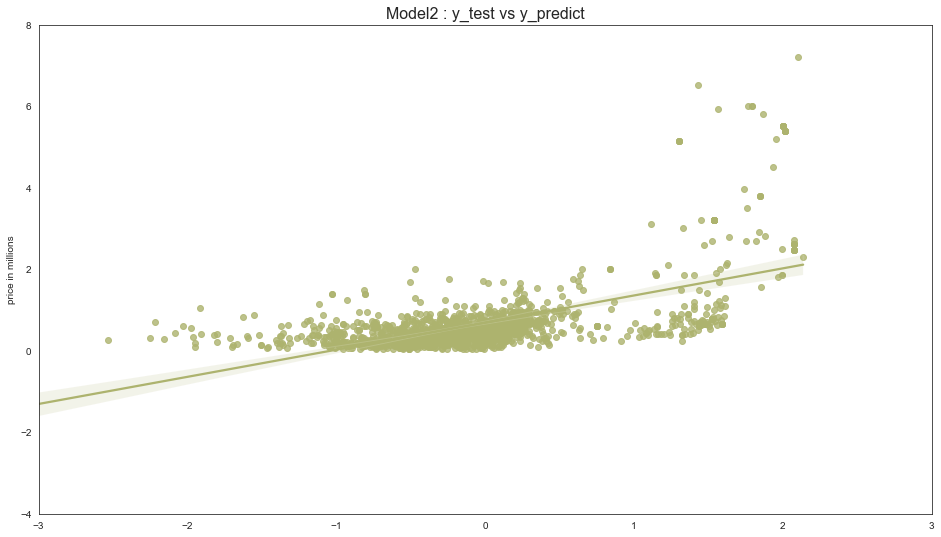

In [100]:
#displaying regression plot using y_test & y_prediction
plt.figure(figsize=(16,9))
plt.title('Model2 : y_test vs y_predict',fontsize = 16)
sns.regplot(y=y_test,x=y_pred2,color='#adb36e')
plt.xlim(-3,3)
plt.ylim(-4,8)
plt.show()

In [101]:
#creating a third featured data
model3_data =  {'age':data.age,
               'engine(cc)':data['engine (CC)'],
               'price in millions' : data.selling_price}
model3 = pd.DataFrame(data=model3_data)

In [102]:
# concatenating dummy variable columns into model3
model3 = pd.concat([model3,fuel_dummy['Diesel'],owner_dummy,seller_type_dummy],axis=1)
model3

,age,engine(cc),price in millions,Diesel,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Dealer,Individual,Trustmark Dealer
0,6,1248,0.450,1,1,0,0,0,0,0,1,0
1,6,1498,0.370,1,0,0,1,0,0,0,1,0
2,14,1497,0.158,0,0,0,0,0,1,0,1,0
3,10,1396,0.225,1,1,0,0,0,0,0,1,0
4,13,1298,0.130,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,1197,0.320,0,1,0,0,0,0,0,1,0
8124,13,1493,0.135,1,0,1,0,0,0,0,1,0
8125,11,1248,0.382,1,1,0,0,0,0,0,1,0
8126,7,1396,0.290,1,1,0,0,0,0,0,1,0


In [103]:
# since there is only fuel column is binomial so changing name only the fuel column accordingly
model3.rename(columns={'Diesel':'isDiesel'},inplace=True)

In [104]:
#verifying adjustmensts about model 3
model3

,age,engine(cc),price in millions,isDiesel,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Dealer,Individual,Trustmark Dealer
0,6,1248,0.450,1,1,0,0,0,0,0,1,0
1,6,1498,0.370,1,0,0,1,0,0,0,1,0
2,14,1497,0.158,0,0,0,0,0,1,0,1,0
3,10,1396,0.225,1,1,0,0,0,0,0,1,0
4,13,1298,0.130,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,1197,0.320,0,1,0,0,0,0,0,1,0
8124,13,1493,0.135,1,0,1,0,0,0,0,1,0
8125,11,1248,0.382,1,1,0,0,0,0,0,1,0
8126,7,1396,0.290,1,1,0,0,0,0,0,1,0


In [105]:
#determining price and features variable and spliting data into train & test
price = model3['price in millions']
features = model3.drop('price in millions',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,price,test_size = 0.2, random_state = 42)

In [106]:
# scaling x_train & x_test in range(0,1)
scaller = MinMaxScaler(feature_range=(0,1))
X_train = scaller.fit_transform(X_train)
X_test = scaller.fit_transform(X_test)

In [107]:
#creating third regression model constructor
regr3 = LinearRegression()

In [108]:
# training the model3
regr3.fit(X_train,y_train)

LinearRegression()

In [109]:
#showing coefficients
regr3.coef_

array([-1.88779648,  2.13586591, -0.08441003, -0.29473646, -0.20577834,
       -0.36068608,  1.15952705, -0.29832617,  0.4137627 , -0.191175  ,
       -0.2225877 ])

In [110]:
#creating the formula
_str = "y = "
for i,m in enumerate(regr3.coef_):
    _str += "x_{}*{} + ".format(i+1,m)
_str += str(regr3.intercept_)   

In [111]:
#showing the general formula
print(_str)

y = x_1*-1.8877964775664444 + x_2*2.1358659063315932 + x_3*-0.08441002583574837 + x_4*-0.29473646015803107 + x_5*-0.20577834189519703 + x_6*-0.36068608090910753 + x_7*1.1595270548128336 + x_8*-0.2983261718504962 + x_9*0.41376270070888493 + x_10*-0.1911749961372737 + x_11*-0.22258770457161214 + 0.9484437589010235


In [112]:
# showing the score of the third model
print(regr3.score(X_test,y_test))

0.4432793013866181


In [113]:
#predicting price using model 3
y_pred3 = regr3.predict(X_test)
y_pred3

array([1.51280829, 0.3066898 , 0.07541318, ..., 1.36734045, 2.13497772,
       1.00062717])

In [114]:
#calculating mean squared error
mse3 = mean_squared_error(y_test,y_pred3)
mse3

0.3950681836352101

In [115]:
# calcualting mean absolute error
mae3 = mean_absolute_error(y_test,y_pred3)
mae3

0.3812292149895208

In [116]:
#calculating r2 score
r2_3 = r2_score(y_test,y_pred3)
r2_3

0.4432793013866181

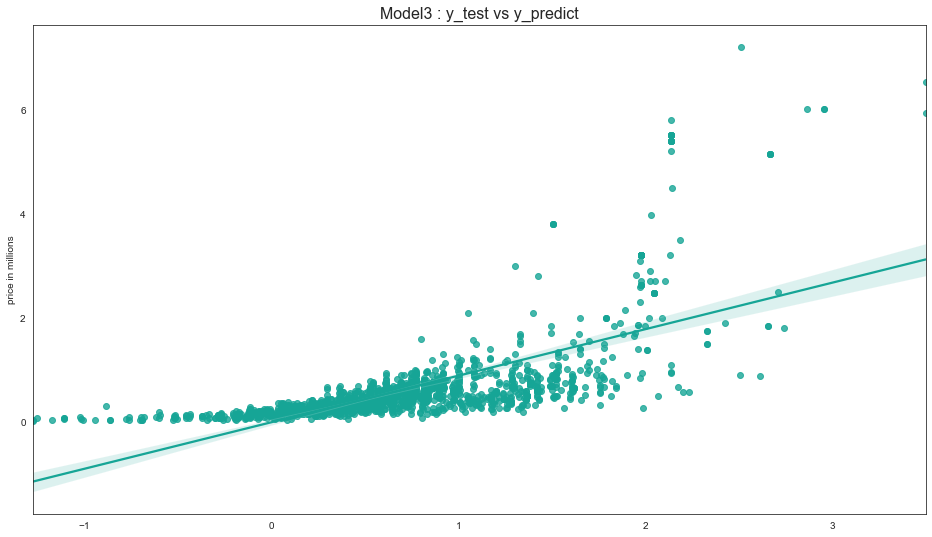

In [117]:
#displaying regression plot using y_test & y_prediction
plt.figure(figsize=(16,9))
plt.title('Model3 : y_test vs y_predict',fontsize = 16)
sns.regplot(y=y_test,x=y_pred3,color='#16a596')
plt.show()

In [118]:
# creating dictionary to store 3 models' coefficients
models_coefs = {'Model1': regr1.coef_,
                'Model2': regr2.coef_,
                'Model3': regr3.coef_
}
models_coefs

{'Model1': array([-1.66237264,  1.58078092, -1.00246008]),
 'Model2': array([-0.07375494, -6.42219465, -0.6692759 , -1.30098714,  0.44515605]),
 'Model3': array([-1.88779648,  2.13586591, -0.08441003, -0.29473646, -0.20577834,
        -0.36068608,  1.15952705, -0.29832617,  0.4137627 , -0.191175  ,
        -0.2225877 ])}

In [119]:
#collecting three models' errors
model1_errors = {'MSE':mse1,
                 'MAE':mae1,
                 'R2' :r2_1}
model2_errors =  {'MSE':mse2,
                 'MAE':mae2,
                 'R2' :r2_2}
model3_errors =  {'MSE':mse3,
                 'MAE':mae3,
                 'R2' :r2_3}
errors = pd.DataFrame([model1_errors,model2_errors,model3_errors])

In [120]:
errors

,MSE,MAE,R2
0,0.351564,0.328007,0.504585
1,1.021710,0.800419,-0.439770
2,0.395068,0.381229,0.443279


In [121]:
# renaming indexes as model names
errors.rename(index={0 : 'Model 1',
                    1 : 'Model 2',
                    2 : 'Model 3'},inplace=True)

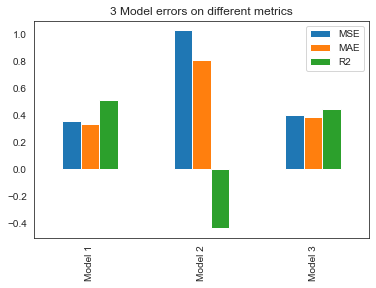

In [122]:
# ploting metrics as a barchart
errors.plot(kind = 'bar')
plt.title("3 Model errors on different metrics")
plt.show()